In [2]:
!pip install swig
!pip install gymnasium[box2d]
!pip install opencv-python
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
#------------------------
# Training the DQN agent 
#------------------------

# The soruce .py file train a DQN agent by default
#!python dqn_doubledqn_carracing.py

/home/hl9h/.local/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists

Starting training the dqn agent...
^C
Traceback (most recent call last):
  File "/sfs/gpfs/tardis/home/hl9h/MSDS/DS5004/project/dqn_doubledqn_carracing.py", line 335, in <module>
    train(agent, env)
  File "/sfs/gpfs/tardis/home/hl9h/MSDS/DS5004/project/dqn_doubledqn_carracing.py", line 253, in train
    next_obs, reward, terminated, truncated, info = env.step(cont_action)
                                                    ^^^^^^^^^^^^^^^^^^^^^
  File "/home/hl9h/.local/lib/python3.12/site-packages/gymnasium/wrappers/common.py", line 125, in step
    observation, reward, terminated, truncated, info = self.env.step(ac

In [ ]:
# Evaluate 

In [ ]:
#-------------------------------
# Training the Double-DQN agent
#-------------------------------
import random
import numpy as np
import pandas as pd
import cv2
import time
from collections import deque
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gymnasium as gym
import os
import dqn_doubledqn_carracing as car

ENV_ID = "CarRacing-v3"   # target environment version
SEED = 42

# create env without rendering for training
env = gym.make(ENV_ID, render_mode=None)
env.reset(seed=SEED)

dbl_dqn_agent = car.Agent(double_dqn=True)

#car.train(dbl_dqn_agent, env)

print("\nRunning evaluation with rendering.")
env = gym.make(ENV_ID, render_mode="human")
car.evaluate(dbl_dqn_agent, env, episodes=3)



/home/hl9h/.local/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists



Starting training the double_dqn agent...
Episode:    1 | EpisodeReward:   -57.4 | Avg50EpReward:  -57.38 | Epsilon: 0.998
Episode:    2 | EpisodeReward:   -52.9 | Avg50EpReward:  -55.12 | Epsilon: 0.996
Episode:    3 | EpisodeReward:   -50.9 | Avg50EpReward:  -53.71 | Epsilon: 0.994
Episode:    4 | EpisodeReward:   -65.2 | Avg50EpReward:  -56.58 | Epsilon: 0.992
Episode:    5 | EpisodeReward:   -59.3 | Avg50EpReward:  -57.13 | Epsilon: 0.991
Episode:    6 | EpisodeReward:   -55.7 | Avg50EpReward:  -56.89 | Epsilon: 0.989
Episode:    7 | EpisodeReward:   -64.5 | Avg50EpReward:  -57.97 | Epsilon: 0.987
Episode:    8 | EpisodeReward:   -58.0 | Avg50EpReward:  -57.97 | Epsilon: 0.985
Episode:    9 | EpisodeReward:   -52.6 | Avg50EpReward:  -57.37 | Epsilon: 0.983
Episode:   10 | EpisodeReward:   -57.8 | Avg50EpReward:  -57.41 | Epsilon: 0.981
Episode:   11 | EpisodeReward:   -53.2 | Avg50EpReward:  -57.03 | Epsilon: 0.979
Episode:   12 | EpisodeReward:   -54.5 | Avg50EpReward:  -56.82 | 

In [ ]:
#--------------------------------------
# Training the Dueling Double-DQN agent 
#--------------------------------------

# The soruce .py file train a DQN agent by default
!python duelingdqn_carracing.py

/home/hl9h/.local/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists

Starting training the dueling_double_dqn agent...


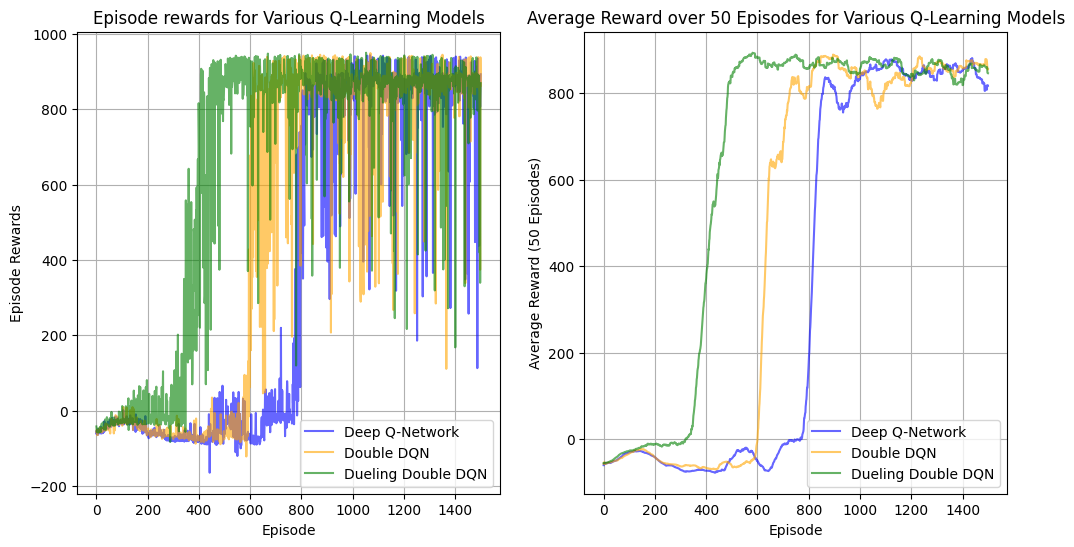

In [19]:
#--------------------------------------
# Plot training results
#--------------------------------------

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load training rewards from CSV file
q_models_rewards = pd.read_csv('q_learning_results.csv')
dqn_rewards = q_models_rewards[q_models_rewards['Model'] == 'dqn']
double_dqn_rewards = q_models_rewards[q_models_rewards['Model'] == 'double_dqn']
dueling_ddqn_rewards = q_models_rewards[q_models_rewards['Model'] == 'dueling_double_dqn']

# Make subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Episode Reward for each model
axs[0].plot(np.arange(1500), dqn_rewards['EpisodeReward'], label='Deep Q-Network', color='blue', alpha=0.6)
axs[0].plot(np.arange(1500), double_dqn_rewards['EpisodeReward'], label='Double DQN', color='orange', alpha=0.6)
axs[0].plot(np.arange(1500), dueling_ddqn_rewards['EpisodeReward'], label='Dueling Double DQN', color='green', alpha=0.6)
axs[0].set_title("Episode rewards for Various Q-Learning Models")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Episode Rewards")
axs[0].legend()
axs[0].grid(True)

# Plot the Average Reward over 50 Episodes for each model
axs[1].plot(np.arange(1500), dqn_rewards['Avg50EpReward'], label='Deep Q-Network', color='blue', alpha=0.6)
axs[1].plot(np.arange(1500), double_dqn_rewards['Avg50EpReward'], label='Double DQN', color='orange', alpha=0.6)
axs[1].plot(np.arange(1500), dueling_ddqn_rewards['Avg50EpReward'], label='Dueling Double DQN', color='green', alpha=0.6)
axs[1].set_title("Average Reward over 50 Episodes for Various Q-Learning Models")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Average Reward (50 Episodes)")
axs[1].legend()
axs[1].grid(True)

plt.show()